In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['duration',
                'protocol_type',
                'service',
                'flag',
                'src_bytes',
                'dst_bytes',
                'land',
                'wrong_fragment',
                'urgent',
                'hot',
                'num_failed_logins',
                'logged_in',
                'num_compromised',
                'root_shell',
                'su_attempted',
                'num_root',
                'num_file_creations',
                'num_shells',
                'num_access_files',
                'num_outbound_cmds',
                'is_host_login',
                'is_guest_login',
                'count',
                'srv_count',
                'serror_rate',
                'srv_serror_rate',
                'rerror_rate',
                'srv_rerror_rate',
                'same_srv_rate',
                'diff_srv_rate',
                'srv_diff_host_rate',
                'dst_host_count',
                'dst_host_srv_count',
                'dst_host_same_srv_rate',
                'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate',
                'dst_host_srv_serror_rate',
                'dst_host_rerror_rate',
                'dst_host_srv_rerror_rate',
                'intrusion_type'
               ]

df = pd.read_csv('kddcup.data.csv', names=columns, header=None)

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
# Dividing into normal and abnormal connections
df['status'] = 'non-threat'
df['status'].loc[df.intrusion_type != 'normal.'] = 'threat'

C:\Users\SinjiniGhosh\AppData\Local\Temp\ipykernel_3532\2281222077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'].loc[df.intrusion_type != 'normal.'] = 'threat'


In [5]:
# Converting the features to the appropriate data type according to the metadata
df['land'] = df['land'].astype('object')
df['logged_in'] = df['logged_in'].astype('object')
df['is_host_login'] = df['is_host_login'].astype('object')
df['is_guest_login'] = df['is_guest_login'].astype('object')

In [6]:
# Encoding the target column
df['status'][df['status'] == 'non-threat'] = 0
df['status'][df['status'] == 'threat'] = 1

C:\Users\SinjiniGhosh\AppData\Local\Temp\ipykernel_3532\479673911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'][df['status'] == 'non-threat'] = 0
C:\Users\SinjiniGhosh\AppData\Local\Temp\ipykernel_3532\479673911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'][df['status'] == 'threat'] = 1


<AxesSubplot:xlabel='status', ylabel='count'>

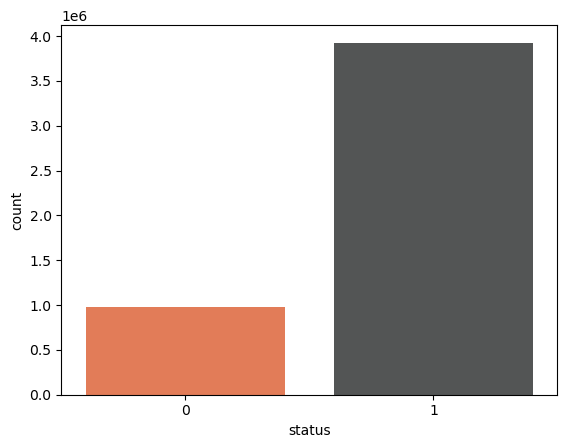

In [7]:
packt_palette = ["#f97141","#535555", "#89452D", "#1a1a1a",  "#573428",    "#E4E7ED"]

sns.countplot(x='status', data=df, palette=packt_palette)

There is a huge imbalance of classes. The class labelled '1', have much larger number of values than the ones labelled '0'

In [8]:
# Class count
count_class_1, count_class_0 = df['status'].value_counts()


# Divide by class
df_class_0 = df[df['status'] == 0]
df_class_1 = df[df['status'] == 1]

df_class_1.shape

(3925650, 43)

In [9]:
count_class_0

972781

#### Random Undersampling

Random under-sampling:
1    972781
0    972781
Name: status, dtype: int64


<AxesSubplot:xlabel='status', ylabel='count'>

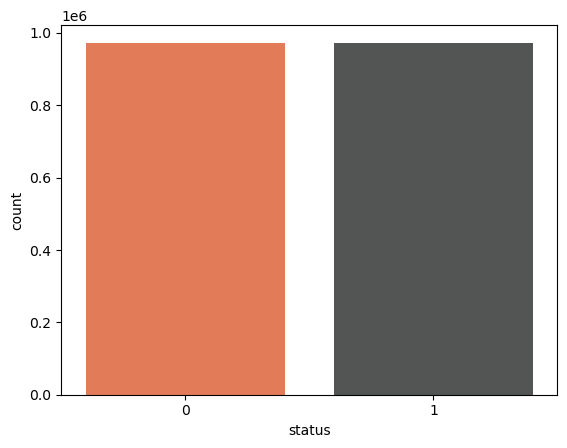

In [10]:
# Random Undersampling

df_class_1_under = df_class_1.sample(count_class_0)
df_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_under['status'].value_counts())

sns.countplot(x='status', data=df_under, palette=packt_palette)

In [12]:
# New shape of the dataframe after undersampling
df_under.shape

(1945562, 43)

In [13]:
df_under.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type,status
3198665,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,1
2241161,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,1
3029942,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,1
3140714,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,1
3327119,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,1


In [14]:
# Dividing into dependent and independent features

X = df_under.drop(['intrusion_type', 'status'], axis=1)
y = df_under['status']

In [15]:
# One-hot encoding

X_transformed = pd.get_dummies(X, drop_first=True)

C:\Users\SinjiniGhosh\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [16]:
X_transformed.shape

(1945562, 116)

In [17]:
# Scaling the variables to the same scale

from sklearn.preprocessing import StandardScaler

X_transformed_scaled = StandardScaler().fit_transform(X_transformed)

In [18]:
# PCA to find the optimal number of features

from sklearn.decomposition import PCA

pca = PCA()

pca_data = pca.fit_transform(X_transformed_scaled)

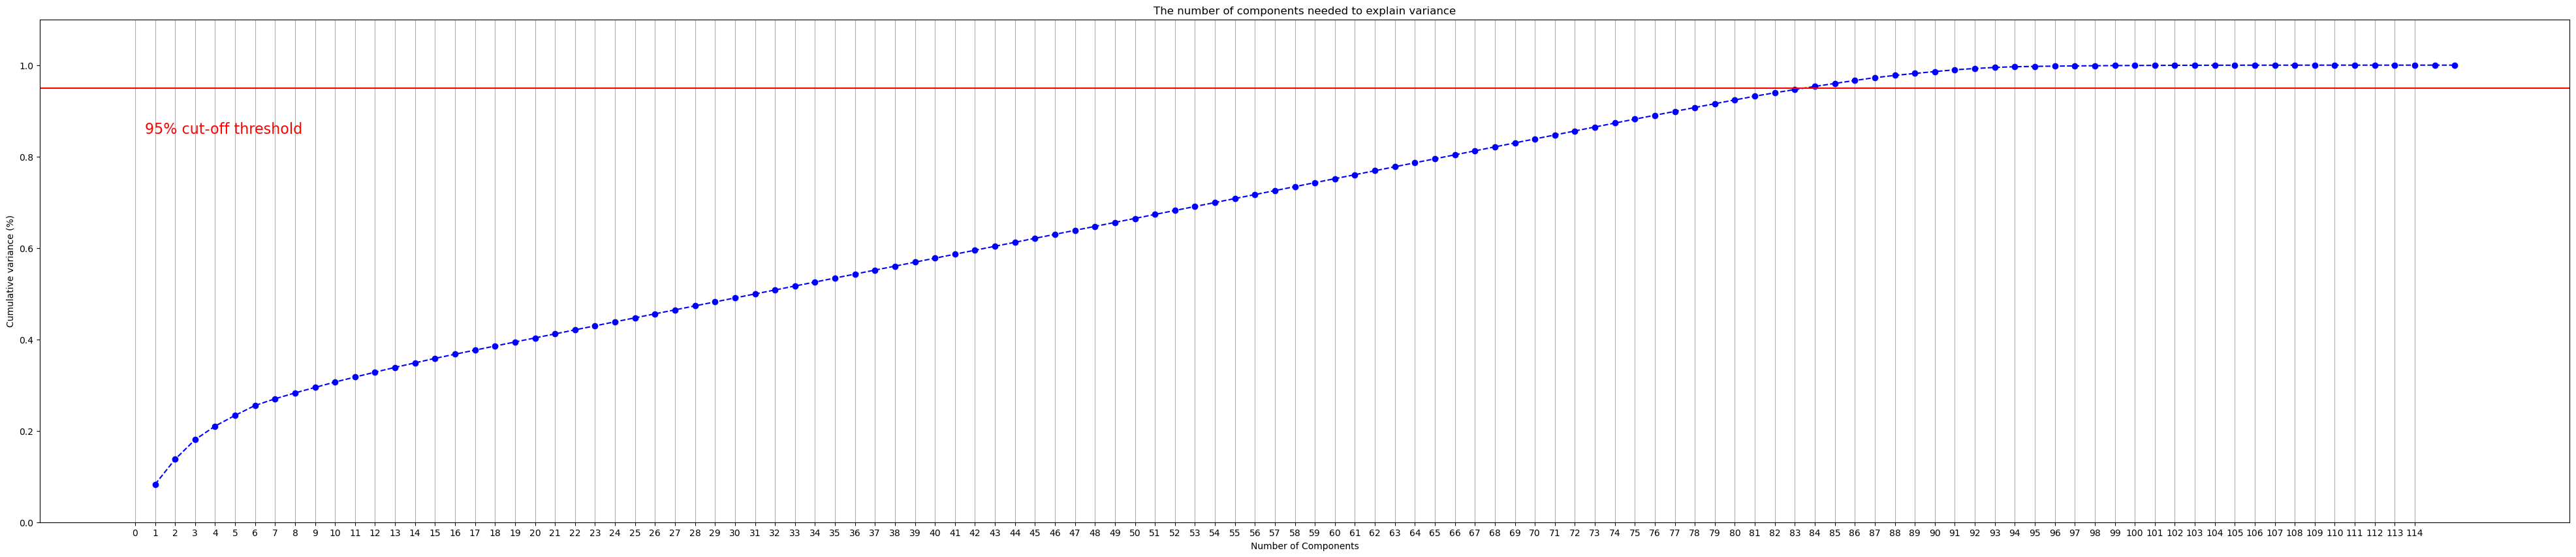

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50, 10)

fig, ax = plt.subplots()
xi = np.arange(1, 117, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 115, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

According to the above graph, 83 features can explain 95% of the variance in the dataset

In [20]:
y = y.astype('int')

In [21]:
# PCA with 83 components

pca2 = PCA(n_components=83)

pca_data2 = pca2.fit_transform(X_transformed_scaled)

In [22]:
pca_data2.shape

(1945562, 83)

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pca_data2, y, test_size=0.4)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

C:\Users\SinjiniGhosh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_preds = lr.predict(x_test)


In [26]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix

In [27]:
accuracy_score(y_preds, y_test)

0.9986880400912332

In [28]:
f1_score(y_preds, y_test)

0.9986863520859468

In [29]:
confusion_matrix(y_preds, y_test)

array([[389102,    649],
       [   372, 388102]], dtype=int64)

C:\Users\SinjiniGhosh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'Predicted label')

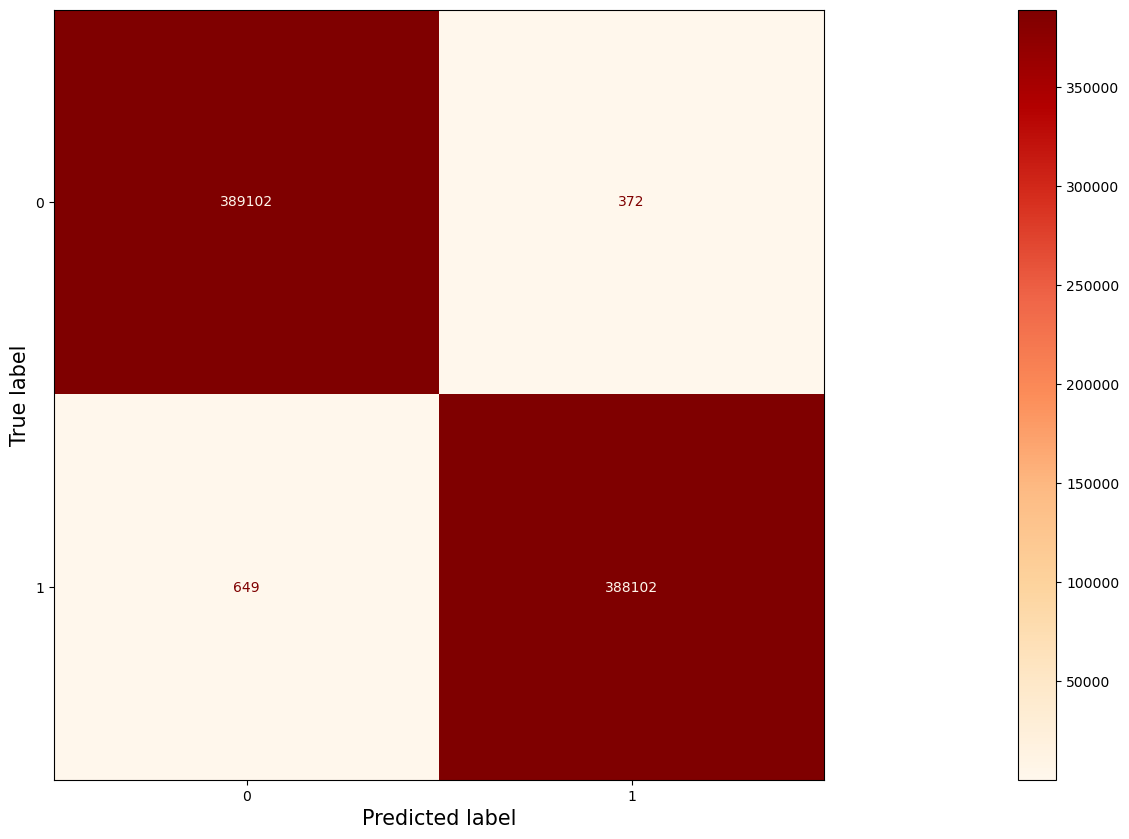

In [37]:
# confusion matrix

plot_confusion_matrix(lr, x_test, y_test, cmap="OrRd")
plt.ylabel('True label', size=15)
plt.xlabel('Predicted label', size=15)

### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
y_preds_tree = dt.predict(x_test)

In [34]:
print("Accuracy Score: ", accuracy_score(y_preds_tree, y_test))
print("F1 Score: ", f1_score(y_preds_tree, y_test))

Accuracy Score:  0.9998419480227441
F1 Score:  0.999841800032669


In [35]:
confusion_matrix(y_preds_tree, y_test)

array([[389415,     64],
       [    59, 388687]], dtype=int64)

C:\Users\SinjiniGhosh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'True Label')

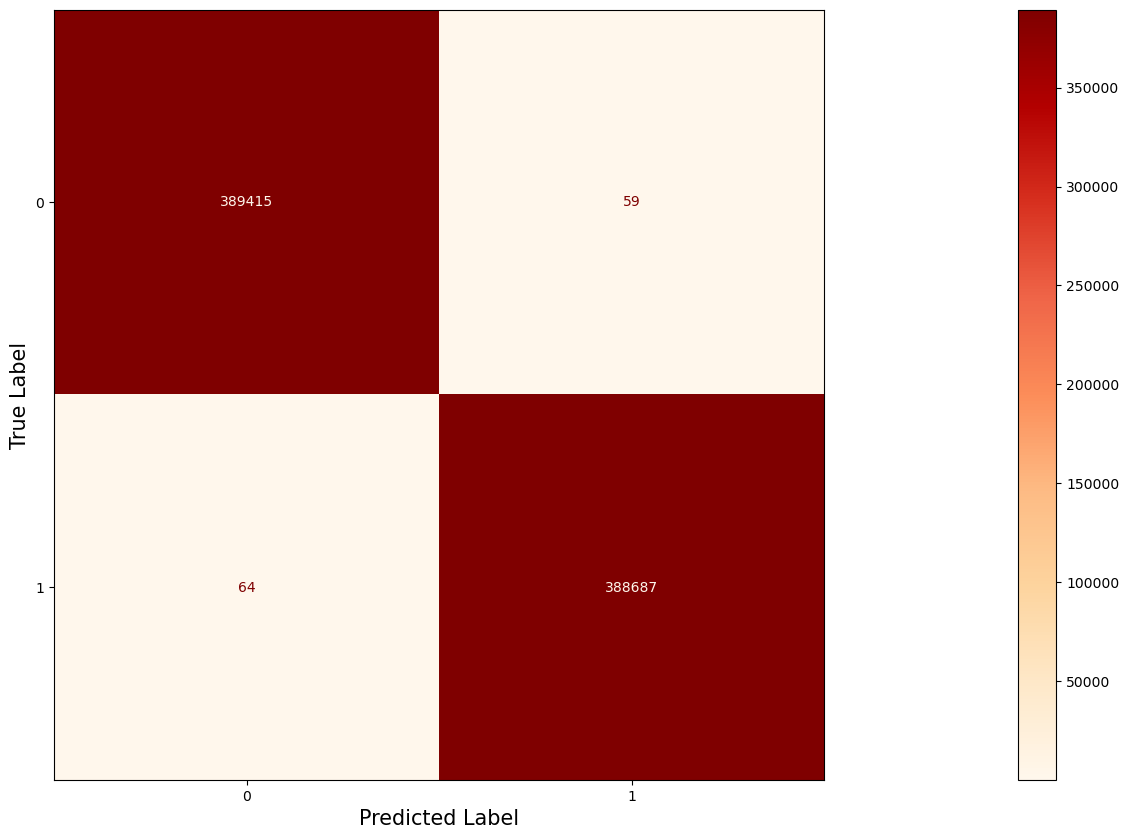

In [38]:
# Confusion matrix

plot_confusion_matrix(dt, x_test, y_test, cmap='OrRd')
plt.xlabel('Predicted Label', size=15)
plt.ylabel('True Label', size=15)